## Урок 1. Кейс 1. EDA по Hourly Energy Consumption и Brent

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

**Вопрос 1**. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

**Ответ:**

а) зависимость цены на недвижимость в конкретном регионе от времени,

**Да**

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

**Да**. Если измеряется скорость самолета на разных временных промежутках.

в) количество отказов компьютера,

**Да**. Если измеряется количество отказов одних и тех же объектов (компьютеров) на разных временных промежутках.

г) число обращений в поликлинику по району,

**Да**. Если измеряется число обращений для одних и тех же объектов (поликлиник) на разных временных промежутках.

д) координаты автобуса при движении по маршруту,

**Да**. Каждый момент времени будет содержать координаты (необязательно одинаковые)

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

**Да**. Каждый момент времени будет содержать координаты (необязательно одинаковые)

**Вопрос 2**. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.



In [2]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates = [0])
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [3]:
df['DUQ_MW'].isnull().sum()

0

Первичный анализ показывает, что все данные на месте

Text(0, 0.5, 'Мвт')

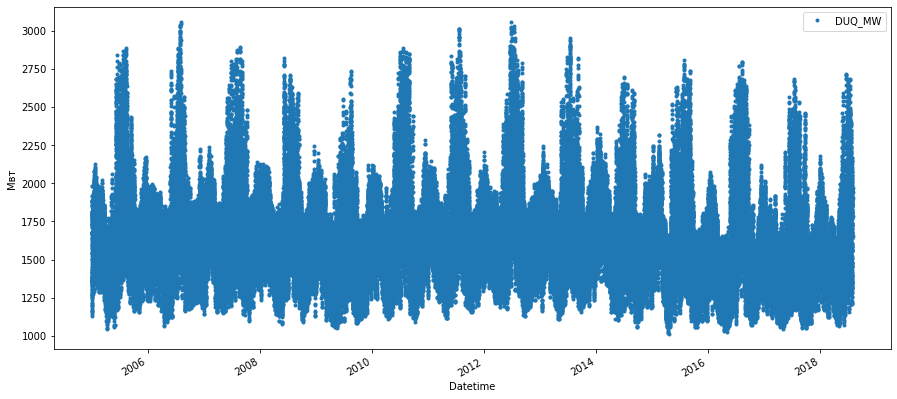

In [4]:
df.plot(style = '.', figsize = (15,7))
plt.ylabel('Мвт')

Визуальный анализ подтвердил наличие сезонности в объемах потребления энергии

Сократим объем занимаемой памяти, изменив тип данных

In [5]:
df.dtypes

DUQ_MW    float64
dtype: object

In [6]:
df['DUQ_MW'] = df['DUQ_MW'].astype(int)
df.dtypes

DUQ_MW    int32
dtype: object

Проверим данные на наличие дубликатов

In [7]:
df['Date'] = df.index
df['Date'].value_counts()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
                      ..
2007-04-01 02:00:00    1
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2013-06-07 22:00:00    1
Name: Date, Length: 119064, dtype: int64

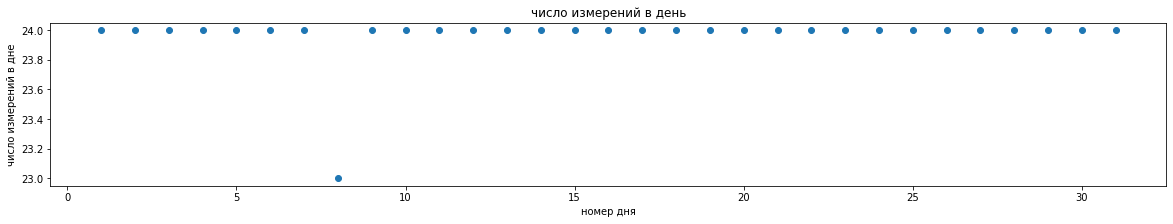

In [8]:
day_H=df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Переход на летнее/зимнее время в 2014-2017 гг. повлиял на количество измерений в марте

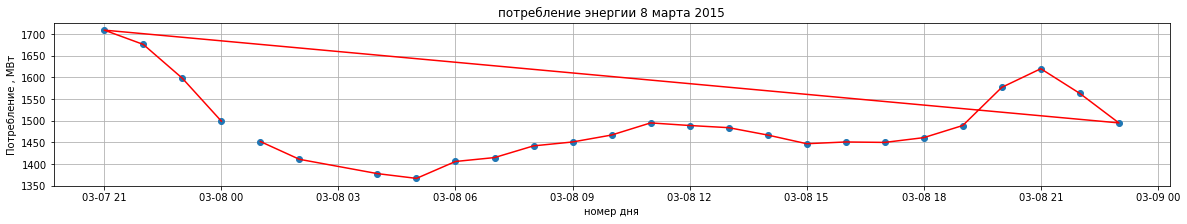

In [9]:
plt.figure(figsize=(20,3))
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(df['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,df['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.grid()
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

In [10]:
v1 = list((df['2014-03-09 02:00:00']['DUQ_MW'].values + df['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
print(v1)
v2 = list((df['2015-03-08 02:00:00']['DUQ_MW'].values + df['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v3 = list((df['2016-03-13 02:00:00']['DUQ_MW'].values + df['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v4 = list((df['2017-03-12 02:00:00']['DUQ_MW'].values + df['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v1[0],v2[0],v3[0],v4[0]],(4,1))
v

df_df = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_df['Date'] = df_df.index
df_df.head()
#
df = df.append(df_df,sort = False)
df.tail()

[1415.0]


,DUQ_MW,Date
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


Уберем дубликаты

In [11]:
count_data = df['Date'].value_counts()

data = df.loc[count_data.iloc[:4].index]
df_ = data.groupby('Date').mean()
df_['Date'] = df_.index

df = df.drop_duplicates(subset = 'Date', keep=False)
df = df.append(df_)

df['Date'].value_counts()

2010-07-31 10:00:00    1
2017-03-11 00:00:00    1
2015-01-02 20:00:00    1
2006-12-27 21:00:00    1
2011-07-22 21:00:00    1
                      ..
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2010-05-12 21:00:00    1
2013-06-07 22:00:00    1
Name: Date, Length: 119068, dtype: int64

Отсортируем данные по индексу (дате)

In [12]:
df = df.sort_index()

**Вопрос 3**. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.



In [13]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates = [0])
brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [14]:
brent['Значение'].isnull().sum() # проверка на пропуски

0

In [15]:
brent['Date'] = brent.index

brent = brent.sort_values(by='Дата') # отсортируем по дате в обратном порядке

for i in range(1, len(brent)): # рассчитаем временные промежутки между наблюдениями
    brent.loc[brent.index[i], 'Delta'] = brent.loc[brent.index[i], 'Date'] - brent.loc[brent.index[i-1], 'Date']
    
brent['Dayofweek'] = brent['Date'].dt.dayofweek # добавим дни недели

In [16]:
brent['Date'].value_counts() # даты не повторяются

2016-11-14    1
2013-02-01    1
2012-10-23    1
2015-01-26    1
2018-05-02    1
             ..
2017-02-09    1
2014-10-29    1
2011-05-27    1
2018-12-03    1
2017-09-19    1
Name: Date, Length: 2667, dtype: int64

In [17]:
brent['Delta'].value_counts()

1 days     2183
2 days      363
3 days      109
4 days       10
11 days       1
Name: Delta, dtype: int64

In [18]:
brent.loc[brent['Delta'] == '2 days', 'Dayofweek'].value_counts()

6    349
2      6
4      4
3      3
0      1
Name: Dayofweek, dtype: int64

Видно, что появление двухдневных пропусков связано преимущественно с неторговыми днями в субботу. Кроме того, есть большое количество пропущенных дней из-за праздников и других причин. Заполним пропущенные дни ценами последних доступных торговых дней.

In [19]:
brent.loc[brent['Delta']!= '1 days']

,Значение,Date,Delta,Dayofweek
Дата,,,,
2010-09-01,76.37,2010-09-01,NaT,2
2010-09-13,79.19,2010-09-13,2 days,0
2010-09-19,78.23,2010-09-19,2 days,6
2010-09-26,78.94,2010-09-26,2 days,6
2010-10-03,83.69,2010-10-03,2 days,6
...,...,...,...,...
2019-08-04,61.33,2019-08-04,2 days,6
2019-08-11,58.27,2019-08-11,2 days,6
2019-08-18,58.89,2019-08-18,2 days,6


In [20]:
brent = brent.asfreq('1D', method='PAD')
brent = brent.drop(columns = 'Dayofweek')

brent['Значение'].isnull().sum(), brent.shape

(0, (3288, 3))

In [21]:
brent.tail() # видно, что пропущенное наблюдение за 2019-08-31 приняло значение цены Brent за 2019-08-30

,Значение,Date,Delta
Дата,,,
2019-08-28,59.84,2019-08-28,1 days
2019-08-29,60.37,2019-08-29,1 days
2019-08-30,59.19,2019-08-30,1 days
2019-08-31,59.19,2019-08-30,1 days
2019-09-01,58.84,2019-09-01,2 days


In [22]:
brent_w = brent.resample('W').mean()
brent_w.describe()

,Значение
count,470.000000
mean,80.766077
std,26.649269
min,28.992857
25%,56.091786
50%,76.616571
75%,107.960357
max,125.171429


In [23]:
brent_m = brent.resample('M').mean()
brent_m.describe()

,Значение
count,109.000000
mean,80.585267
std,26.645361
min,32.429032
25%,57.181290
50%,75.777333
75%,108.533214
max,124.507419


**Вопрос 4**. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.



Text(0.5, 1.0, 'Среднее значение цены Brent')

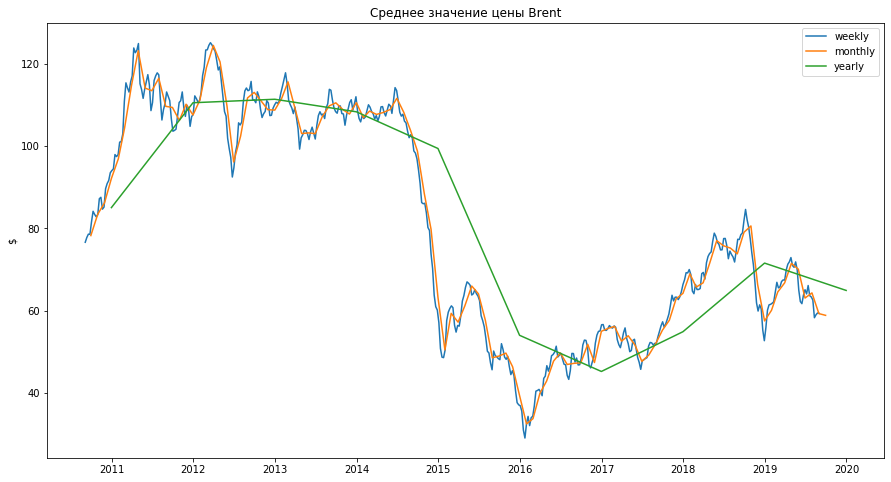

In [24]:
brent_w = brent.resample('W').mean()
brent_m = brent.resample('M').mean()
brent_y = brent.resample('Y').mean()

plt.plot(brent_w, label = 'weekly')
plt.plot(brent_m, label = 'monthly')
plt.plot(brent_y, label = 'yearly')
plt.legend(loc = 'upper right')
plt.ylabel('$')
plt.title('Среднее значение цены Brent')

Text(0.5, 1.0, 'Среднее отклонение цены Brent')

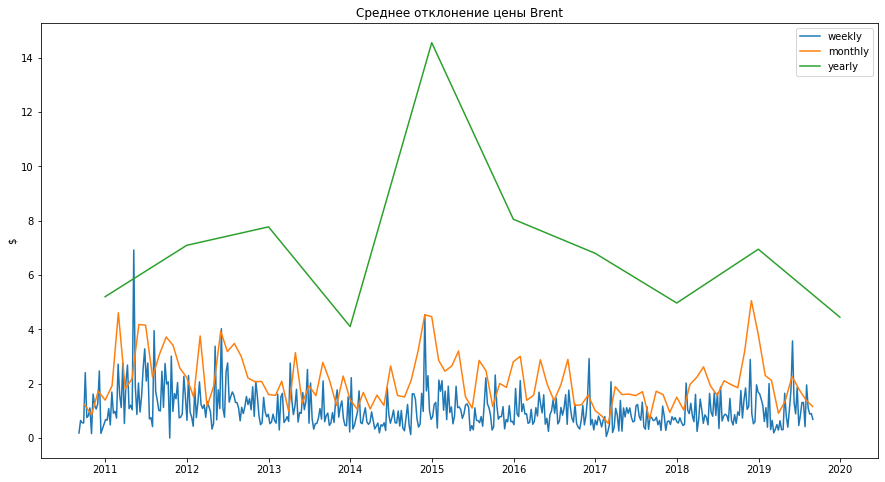

In [25]:
brent_w = brent.resample('W').std()
brent_m = brent.resample('M').std()
brent_y = brent.resample('Y').std()

plt.plot(brent_w, label = 'weekly')
plt.plot(brent_m, label = 'monthly')
plt.plot(brent_y, label = 'yearly')
plt.legend(loc = 'upper right')
plt.ylabel('$')
plt.title('Среднее отклонение цены Brent')

**Вопрос 5**. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

На примере 2012 года видно, что недельные и месячные графики лучше отражают волатильность цены Brent, чем годовые графики.